In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [9]:


def scale_and_split(df_state):
    # Drop unused columns
    df_state = df_state.drop(columns=['state', 'month'], errors='ignore')

    # Impute missing values
    imputer = SimpleImputer()
    df_imputed = pd.DataFrame(imputer.fit_transform(df_state), columns=df_state.columns)

    # Scale features
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_state.columns)

    # 90/10 split
    total_len = len(df_scaled)
    train_end = int(0.9 * total_len)

    df_train = df_scaled.iloc[:train_end]
    df_test = df_scaled.iloc[train_end:]

    return df_train, df_test, scaler, imputer


def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data.iloc[i:i+window][input_features].values)
        y.append(data.iloc[i+window][target_col])
    return np.array(X), np.array(y)

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# --- Train + Evaluate per State ---


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
✅ Alabama: RMSE = 0.2520, R² = 0.0079


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
✅ Alaska: RMSE = 0.2465, R² = 0.4776


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001E797849760> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
✅ Arizona: RMSE = 0.2632, R² = 0.1188


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
✅ Arkansas: RMSE = 0.1864, R² = 0.5758


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
✅ California: RMSE = 0.3489, R² = -0.0635


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
✅ Colorado: RMSE = 0.2684, R² = 0.0778


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
✅ Connecticut: RMSE = 0.2408, R² = 0.4085


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
✅ Delaware: RMSE = 0.3758, R² = -0.0897


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
✅ District of Columbia: RMSE = 0.1730, R² = 0.5595


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
✅ Florida: RMSE = 0.3531, R² = -0.3387


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
✅ Georgia: RMSE = 0.3351, R² = -0.9458


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step
✅ Hawaii: RMSE = 0.6212, R² = 0.5636


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
✅ Idaho: RMSE = 0.2300, R² = -0.0533


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
✅ Illinois: RMSE = 0.3679, R² = -0.1567


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
✅ Indiana: RMSE = 0.3326, R² = -0.2068


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
✅ Iowa: RMSE = 0.2968, R² = 0.2385


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
✅ Kansas: RMSE = 0.3709, R² = 0.0436


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
✅ Kentucky: RMSE = 0.2837, R² = -0.0669


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
✅ Louisiana: RMSE = 0.1271, R² = 0.7724


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
✅ Maine: RMSE = 0.2181, R² = 0.1865


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
✅ Maryland: RMSE = 0.3371, R² = 0.2676


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
✅ Massachusetts: RMSE = 0.4862, R² = -0.0400


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
✅ Michigan: RMSE = 0.3241, R² = -0.0601


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
✅ Minnesota: RMSE = 0.3618, R² = -0.2487


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
✅ Mississippi: RMSE = 0.2710, R² = 0.3991


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
✅ Missouri: RMSE = 0.2381, R² = 0.1297


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
✅ Montana: RMSE = 0.3310, R² = 0.0385


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
✅ Nebraska: RMSE = 0.3074, R² = 0.4184


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
✅ Nevada: RMSE = 0.4377, R² = 0.2303


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step
✅ New Hampshire: RMSE = 0.2535, R² = 0.6986


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
✅ New Jersey: RMSE = 0.2687, R² = 0.6091


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
✅ New Mexico: RMSE = 0.1960, R² = 0.6354


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
✅ New York: RMSE = 0.4485, R² = 0.3857


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
✅ North Carolina: RMSE = 0.2032, R² = 0.3578


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 351ms/step
✅ North Dakota: RMSE = 0.2225, R² = 0.7549


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 322ms/step
✅ Ohio: RMSE = 0.3280, R² = 0.0559


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
✅ Oklahoma: RMSE = 0.3281, R² = 0.0844


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
✅ Oregon: RMSE = 0.2390, R² = 0.1717


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
✅ Pennsylvania: RMSE = 0.3143, R² = 0.7126


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
✅ Rhode Island: RMSE = 0.3054, R² = 0.2139


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
✅ South Carolina: RMSE = 0.1377, R² = 0.3484


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
✅ South Dakota: RMSE = 0.4291, R² = 0.2385


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
✅ Tennessee: RMSE = 0.2663, R² = 0.2239


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step
✅ Texas: RMSE = 0.2989, R² = 0.2167


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
✅ Utah: RMSE = 0.3121, R² = -0.9834


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
✅ Vermont: RMSE = 0.3432, R² = 0.3809


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
✅ Virginia: RMSE = 0.2910, R² = 0.4635


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step
✅ Washington: RMSE = 0.3535, R² = 0.0666


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
✅ West Virginia: RMSE = 0.2635, R² = 0.2579


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step
✅ Wisconsin: RMSE = 0.2838, R² = 0.2062


c:\Users\nelli\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
✅ Wyoming: RMSE = 0.1103, R² = 0.6906


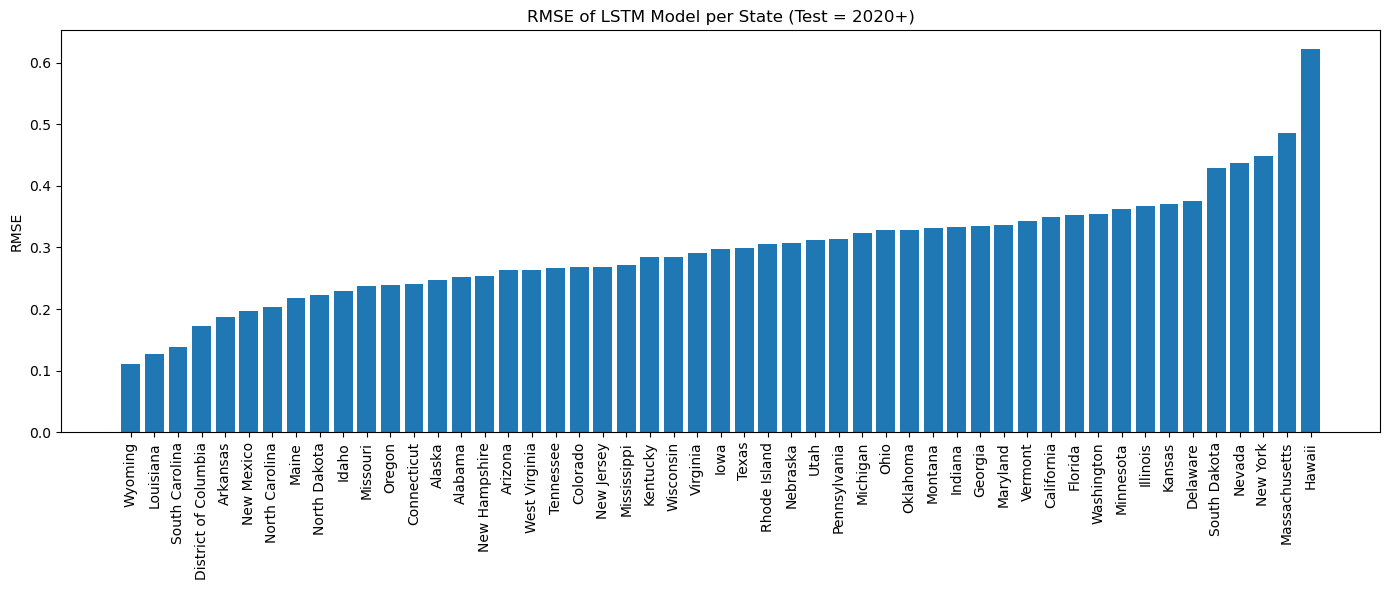

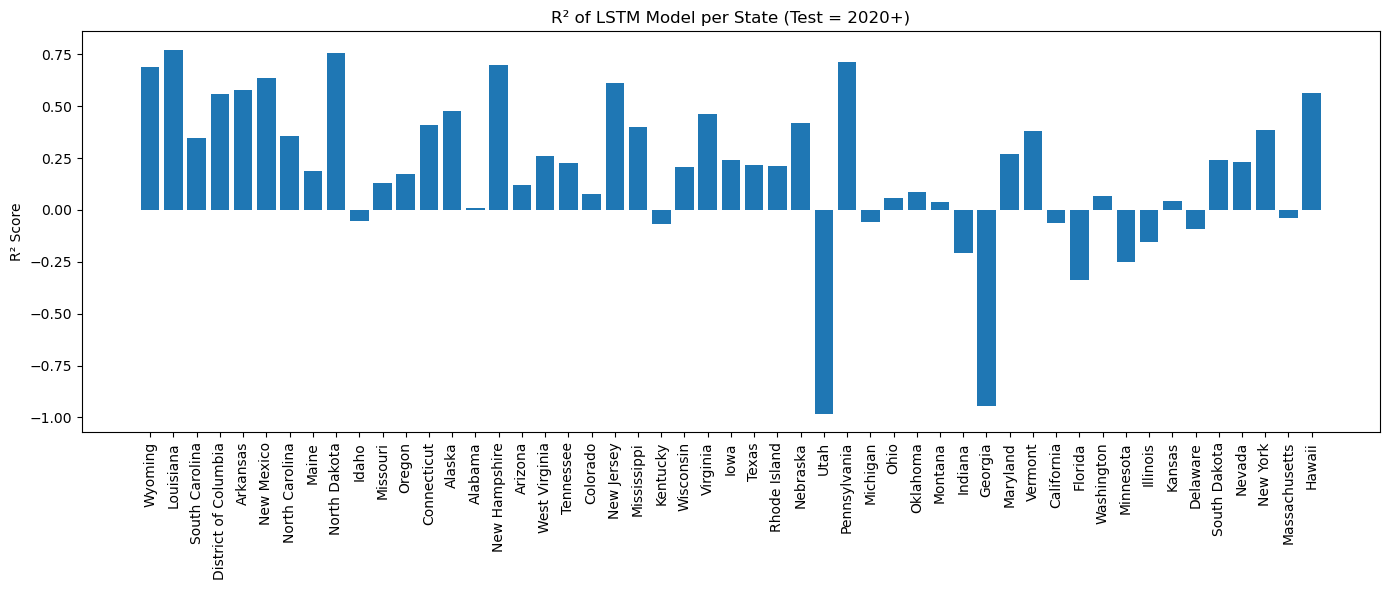

In [1]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# --- Parameters ---
window = 12
target_col = ["Unemployment Rate"]
input_features = ["Unemployment Rate", "median_income", "population", "lfp_rate", "initial_claims"]

rmse_dict = {}
r2_dict = {}

# --- Sequence Creator ---
def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data.iloc[i:i+window][input_features].values)
        y.append(data.iloc[i+window][target_col].values[0])
    return np.array(X), np.array(y)

# --- Scaling Helper ---
def scale_data(df_train, df_test):
    df_train = df_train.drop(columns=['state', 'month'], errors='ignore')
    df_test = df_test.drop(columns=['state', 'month'], errors='ignore')

    imputer = SimpleImputer()
    df_train_imputed = pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns)
    df_test_imputed = pd.DataFrame(imputer.transform(df_test), columns=df_test.columns)

    scaler = MinMaxScaler()
    df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train_imputed), columns=df_train.columns)
    df_test_scaled = pd.DataFrame(scaler.transform(df_test_imputed), columns=df_test.columns)

    return df_train_scaled.reset_index(drop=True), df_test_scaled.reset_index(drop=True), scaler, imputer

# --- LSTM Model Builder ---
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# --- Load Data ---
df = pd.read_csv("Tony_data/merged_data.csv", parse_dates=["month"])
df = df.sort_values(["state", "month"])

# --- Train LSTM for each state ---
for state in df['state'].unique():
    try:
        df_state = df[df['state'] == state].copy().sort_values("month").reset_index(drop=True)

        # Split by date
        df_train = df_state[df_state['month'] < '2020-01-01'].copy()
        df_test = df_state[df_state['month'] >= '2020-01-01'].copy()

        if len(df_train) <= window or len(df_test) == 0:
            raise ValueError("Not enough data before or after 2020")

        # Scale train and test separately
        df_train_scaled, df_test_scaled, scaler, imputer = scale_data(df_train, df_test)

        # Combine for sequence creation
        df_all = pd.concat([df_train_scaled, df_test_scaled]).reset_index(drop=True)
        X_all, y_all = create_sequences(df_all, window)

        # Determine split point after windowing
        train_size = len(df_train_scaled) - window
        X_train, y_train = X_all[:train_size], y_all[:train_size]
        X_test, y_test = X_all[train_size:], y_all[train_size:]

        # Build & train model
        model = build_lstm_model(input_shape=(window, len(input_features)))
        early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
        model.fit(X_train, y_train, validation_data=(X_test, y_test),
                  epochs=500, batch_size=16, verbose=0, callbacks=[early_stop])

        # Predict & evaluate
        y_pred = model.predict(X_test).flatten()
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        rmse_dict[state] = rmse
        r2_dict[state] = r2

        print(f"✅ {state}: RMSE = {rmse:.4f}, R² = {r2:.4f}")

    except Exception as e:
        print(f"❌ Error in {state}: {e}")

# --- Plot Results ---
states_sorted = sorted(rmse_dict, key=rmse_dict.get)

# RMSE Plot
plt.figure(figsize=(14, 6))
plt.bar(states_sorted, [rmse_dict[state] for state in states_sorted])
plt.xticks(rotation=90)
plt.title("RMSE of LSTM Model per State (Test = 2020+)")
plt.ylabel("RMSE")
plt.tight_layout()
plt.show()

# R² Plot
plt.figure(figsize=(14, 6))
plt.bar(states_sorted, [r2_dict[state] for state in states_sorted])
plt.xticks(rotation=90)
plt.title("R² of LSTM Model per State (Test = 2020+)")
plt.ylabel("R² Score")
plt.tight_layout()
plt.show()


In [2]:
# --- Aggregate metrics ---
if rmse_dict and r2_dict:
    # Overall means
    mean_rmse = np.mean(list(rmse_dict.values()))
    mean_r2 = np.mean(list(r2_dict.values()))

    print(f"\n📊 Overall mean RMSE across states: {mean_rmse:.4f}")
    print(f"📊 Overall mean R² across states: {mean_r2:.4f}")

    # Detailed summary table
    df_metrics = pd.DataFrame({
        "RMSE": pd.Series(rmse_dict),
        "R2": pd.Series(r2_dict)
    }).sort_index()

    print("\nSummary statistics for per-state metrics:")
    print(df_metrics.describe().loc[["mean", "std", "min", "max"]])

    # Optional: display the full per-state metrics
    print("\nPer-state metrics:")
    print(df_metrics)
else:
    print("No state metrics available to aggregate.")



📊 Overall mean RMSE across states: 0.2977
📊 Overall mean R² across states: 0.1967

Summary statistics for per-state metrics:
          RMSE        R2
mean  0.297699  0.196741
std   0.091249  0.364127
min   0.110341 -0.983397
max   0.621184  0.772437

Per-state metrics:
                          RMSE        R2
Alabama               0.251975  0.007901
Alaska                0.246450  0.477641
Arizona               0.263168  0.118828
Arkansas              0.186383  0.575825
California            0.348949 -0.063458
Colorado              0.268428  0.077821
Connecticut           0.240784  0.408511
Delaware              0.375848 -0.089700
District of Columbia  0.172968  0.559466
Florida               0.353124 -0.338656
Georgia               0.335075 -0.945805
Hawaii                0.621184  0.563619
Idaho                 0.230005 -0.053320
Illinois              0.367945 -0.156699
Indiana               0.332643 -0.206789
Iowa                  0.296808  0.238495
Kansas                0.370892  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Data (assuming rmse_dict is defined)
states_sorted = sorted(rmse_dict, key=rmse_dict.get)
rmse_values = [rmse_dict[state] for state in states_sorted]

# Normalize RMSE for color mapping
norm = plt.Normalize(min(rmse_values), max(rmse_values))
colors = cm.viridis(norm(rmse_values))  # You can also try 'coolwarm', 'plasma', etc.

# Plot
plt.figure(figsize=(16, 6))
bars = plt.bar(states_sorted, rmse_values, color=colors)

# Optional: Add value labels
for bar, value in zip(bars, rmse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.002,
             f"{value:.2f}", ha='center', va='bottom', fontsize=8)

# Axis formatting
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("RMSE", fontsize=12)
plt.title("RMSE of LSTM Model per State (Color-coded by Performance)", fontsize=14)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), label='RMSE Scale')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


NameError: name 'rmse_dict' is not defined